# 14장 모델의 성능 향상시키기


## 데이터의 확인과 검증셋
- 데이터셋을 학습셋과 테스트셋으로 나누고, 학습셋 안의 데이터를 학습셋과 검증셋으로 또 나눔
- 학습이 끝난 모델을 테스트해 보는것이 테스트셋의 목적이라면, 최적의 학습 파라미터를 찾기 위해 학습 과정에서 사용하는 것이 검증셋임

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

model = Sequential()
model.add(Dense(units = 30,  input_dim=12, activation='relu'))
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) 

/Users/kimdongwoo/-Deep-Learning-for-Everyone-Book/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2527 - loss: 14.2780 - val_accuracy: 0.2346 - val_loss: 5.6871
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2811 - loss: 3.8576 - val_accuracy: 0.8169 - val_loss: 0.3857
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.4659 - val_accuracy: 0.7831 - val_loss: 0.6420
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7612 - loss: 0.7343 - val_accuracy: 0.7831 - val_loss: 0.7238
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7582 - loss: 0.7907 - val_accuracy: 0.7931 - val_loss: 0.6821
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7820 - loss: 0.6958 - val_accuracy: 0.8154 - val_loss: 0.5858
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.5798 - val_accuracy: 0.8292 - val_loss: 0.4689
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8210 - loss: 0.4685 - val_accuracy: 0.8508 - val_loss: 0.3565
Epoch 

In [7]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9454 - loss: 0.1623
Test accuracy:  0.9515384435653687


## 모델 업데이트 하기


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/kimdongwoo/-Deep-Learning-for-Everyone-Book/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 모델 저장 설정 및 실행
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.7585.keras

Epoch 2: saving model to ./data/model/all/02-0.7392.keras

Epoch 3: saving model to ./data/model/all/03-0.7862.keras

Epoch 4: saving model to ./data/model/all/04-0.8031.keras

Epoch 5: saving model to ./data/model/all/05-0.8377.keras

Epoch 6: saving model to ./data/model/all/06-0.8700.keras

Epoch 7: saving model to ./data/model/all/07-0.8985.keras

Epoch 8: saving model to ./data/model/all/08-0.9192.keras

Epoch 9: saving model to ./data/model/all/09-0.9292.keras

Epoch 10: saving model to ./data/model/all/10-0.9354.keras

Epoch 11: saving model to ./data/model/all/11-0.9354.keras

Epoch 12: saving model to ./data/model/all/12-0.9354.keras

Epoch 13: saving model to ./data/model/all/13-0.9331.keras

Epoch 14: saving model to ./data/model/all/14-0.9377.keras

Epoch 15: saving model to ./data/model/all/15-0.9354.keras

Epoch 16: saving model to ./data/model/all/16-0.9338.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [15]:
score = model.evaluate(X_test, y_test)
print('Test accuracy: ',score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9568 - loss: 0.1327
Test accuracy:  0.9592307806015015


## 그래프로 과적합 확인하기



In [16]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25) 


In [18]:
hist_df = pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.955350,0.131533,0.951538,0.135654
1,0.956633,0.128623,0.953077,0.138603
2,0.957660,0.126004,0.947692,0.143851
3,0.956377,0.126686,0.953846,0.134149
4,0.956890,0.123860,0.953077,0.131717
...,...,...,...,...
1995,0.987426,0.033575,0.986154,0.069134
1996,0.987939,0.034741,0.988462,0.064075
1997,0.988966,0.033823,0.986923,0.062653
1998,0.988709,0.035467,0.985385,0.071957


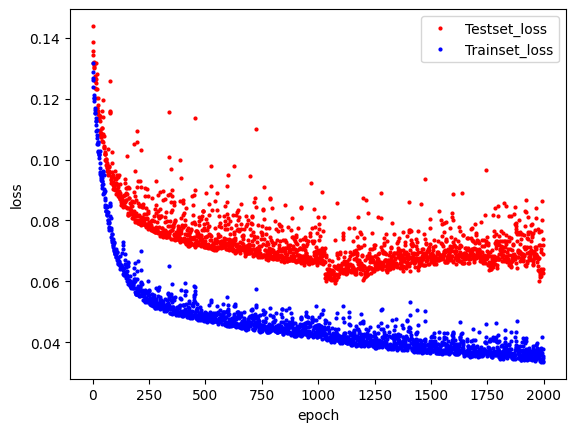

In [19]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장함
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장함
y_loss=hist_df['loss']

# x값을 저장하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시함
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 학습의 자동 중단 

- 위의 그래프를 보면, 학습이 오래 진행될수록 검증셋의 오차는 줄어들지만 테스트셋의 오차는 다시 커진다는 것임
- 과적합때문에 그럼
- 그래서 오차가 커지기전에 학습을 자동으로 중단시키고, 그때의 모델을 저장하는 방법이 필요함


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/kimdongwoo/-Deep-Learning-for-Everyone-Book/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer], verbose=0) #verbose=1 진행 화면 출력, verbose=0 진행 화면 출력 안함.
